In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
df = pd.read_excel('US Superstore data.xls',index_col='Row ID', parse_dates=True)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.shape

(9994, 20)

In [10]:
df['Order Date'].min(),df['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [11]:
df['Sales'].mean()

229.8580008304938

In [12]:
df[['Quantity','Sales']].mean()

Quantity      3.789574
Sales       229.858001
dtype: float64

In [14]:
np.mean(df[['Quantity','Sales']])

Quantity      3.789574
Sales       229.858001
dtype: float64

In [18]:
df[['Profit']].median()

Profit    8.6665
dtype: float64

In [19]:
np.median(df['Profit'])

8.666499999999996

In [23]:
df['Product Name'].mode()

0    Staple envelope
dtype: object

Text(0, 0.5, 'Sales: Quantitative Data')

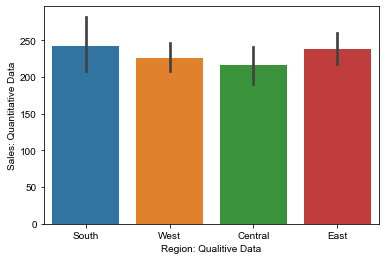

In [27]:
sns.barplot('Region','Sales',data=df)
sns.set()
plt.xlabel('Region: Qualitive Data')
plt.ylabel('Sales: Quantitative Data')

In [29]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [30]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [31]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [32]:
df[['Sub-Category']].head()

,Sub-Category
Row ID,
1,Bookcases
2,Chairs
3,Labels
4,Tables
5,Storage


In [34]:
df[['Customer ID','Ship Mode']].head()

,Customer ID,Ship Mode
Row ID,,
1,CG-12520,Second Class
2,CG-12520,Second Class
3,DV-13045,Second Class
4,SO-20335,Standard Class
5,SO-20335,Standard Class


In [35]:
df[['Customer Name','Quantity']].head()

,Customer Name,Quantity
Row ID,,
1,Claire Gute,2
2,Claire Gute,3
3,Darrin Van Huff,2
4,Sean O'Donnell,5
5,Sean O'Donnell,2


In [36]:
df[['Customer Name','Sales']].head()

,Customer Name,Sales
Row ID,,
1,Claire Gute,261.9600
2,Claire Gute,731.9400
3,Darrin Van Huff,14.6200
4,Sean O'Donnell,957.5775
5,Sean O'Donnell,22.3680


<AxesSubplot:xlabel='Category', ylabel='Profit'>

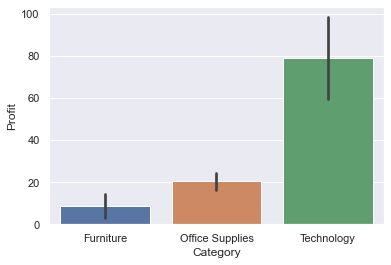

In [37]:
sns.barplot('Category','Profit',data=df)

In [38]:
df[df['Category']=='Technology']['Profit'].mean()

78.75200221981581

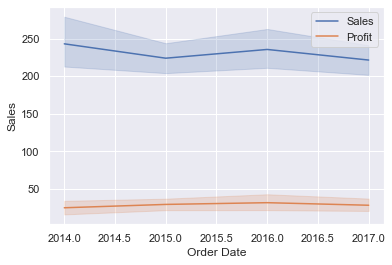

In [45]:
sns.lineplot(df['Order Date'].dt.year,df['Sales'])
sns.lineplot(df['Order Date'].dt.year,df['Profit'])
plt.legend(['Sales','Profit'])

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

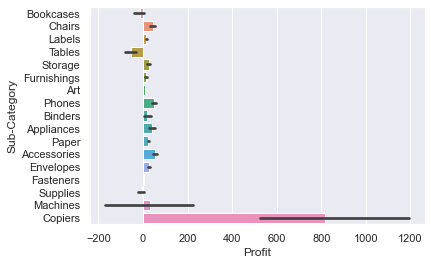

In [50]:
sns.barplot(y=df['Sub-Category'],x=df['Profit'])

<AxesSubplot:xlabel='Order Date', ylabel='Profit'>

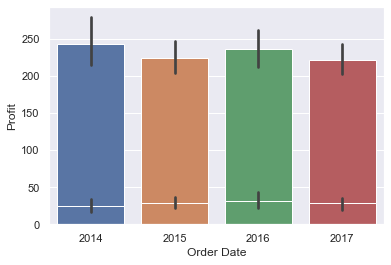

In [55]:
sns.barplot(df['Order Date'].dt.year,df['Sales'])
sns.barplot(df['Order Date'].dt.year,df['Profit'])

In [57]:
#sns.barplot('Sales','Product Name',data=df)

In [58]:
product_sales = df.groupby('Product Name')['Sales'].mean()
product_sales

Product Name
"While you Were Out" Message Book, One Form per Page                                                     8.409333
#10 Gummed Flap White Envelopes, 100/Box                                                                10.325000
#10 Self-Seal White Envelopes                                                                           27.170500
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              69.843429
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 28.667200
                                                                                                          ...    
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     95.532000
iOttie HLCRIO102 Car Mount                                                                              43.178400
iOttie XL Car Mount                                                        

In [63]:
#product_sales.plot(kind='bar')

In [60]:
product_sales.shape

(1850,)

In [73]:
df['ShippingDays'] = (df['Ship Date'] - df['Order Date']).dt.days
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,ShippingDays
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


<AxesSubplot:xlabel='Ship Mode', ylabel='ShippingDays'>

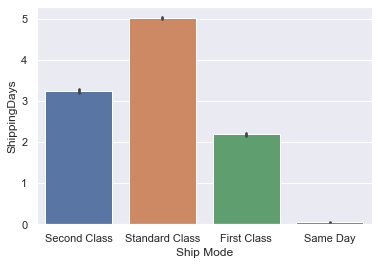

In [75]:
sns.barplot('Ship Mode','ShippingDays',data=df)